# Import necessary packages

In [1]:
import os
os.chdir('E:/github/MSBERT')
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pickle
import torch
import matplotlib.pyplot as plt
from data.ProcessData import MakeTrainData
from model.MSBERTModel import MSBERT
from model.utils import ModelEmbed, ProcessMSP,MSBERTSimilarity

C:\Users\Administrator\Anaconda3\envs\FDNet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def PlotExample(example_msms,idx):
    plt.figure()
    plt.vlines([float(i) for i in example_msms[idx][0]],0,example_msms[idx][1])
    plt.hlines(0,0,max([float(i) for i in example_msms[idx][0]]))
    plt.xlabel('m/z')
    plt.ylabel('Intensity')

# Load example data

In [3]:
demo_file = 'example/demo.msp'
demo_data,demo_smiles = ProcessMSP(demo_file)

100%|████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 6987.18it/s]


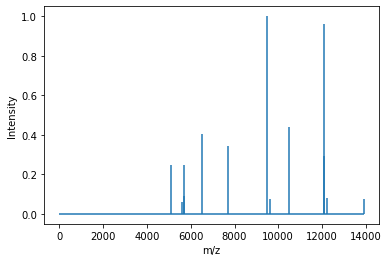

In [4]:
 PlotExample(demo_data,0)

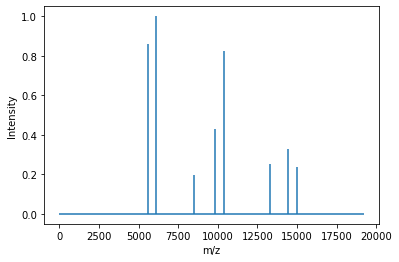

In [5]:
PlotExample(demo_data,1)

# Load MSBERT model

In [7]:
model_file = 'model/MSBERT.pkl'
model = MSBERT(100002, 512, 6, 16, 0,100,3)
model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

# MSBERT embedding

In [8]:
demo_arr = ModelEmbed(model,demo_data,16)

2it [00:01,  1.22it/s]


# Calculate cosine similarity

In [10]:
cos = MSBERTSimilarity(demo_arr,demo_arr)
print(cos.shape)

(21, 21)
